# Predicting variation in EUR/USD exchange rate

In [1]:
#set the working directory
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")

#check
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [2]:
import pandas as pd
import numpy as np
#load the data
df_merged = pd.read_csv("results/sentiment_ecb_pricing.csv.gz", compression="gzip")
df_merged

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,2008-10-31,1.2757,1.3035,-2.132720,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,2008-12-03,1.2623,1.2697,-0.582815,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,2008-12-09,1.2838,1.2854,-0.124475,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,2008-12-24,1.4005,1.3978,0.193161,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,2009-01-05,1.3582,1.3866,-2.048175,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2022-07-11,1.0098,1.0163,-0.639575,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,2022-07-12,1.0042,1.0098,-0.554565,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,2022-07-13,1.0067,1.0042,0.248954,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,2022-07-14,1.0005,1.0067,-0.615874,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


In [3]:
df_merged.columns

Index(['date', 'eur_usd_rate', 'previous_eur_pricing',
       'percent_change_pricing', '5_days_rolling_mean_pricing',
       '10_days_rolling_mean_pricing', '60_days_rolling_mean_pricing',
       '120_days_rolling_mean_pricing', '5_days_exp_rolling_mean_pricing',
       '10_days_exp_rolling_mean_pricing', '60_days_exp_rolling_mean_pricing',
       '120_days_exp_rolling_mean_pricing', 'quantile_0.1_neg_sent',
       'quantile_0.25_neg_sent', 'quantile_0.35_neg_sent',
       'quantile_0.50_neg_sent', 'quantile_0.65_neg_sent',
       'quantile_0.75_neg_sent', 'quantile_0.9_neg_sent', 'mean_neg_sent',
       'sum_neg_sent', 'count_neg_sent', 'std_neg_sent',
       'quantile_0.1_10_days_moving_neg_sent',
       'quantile_0.25_10_days_moving_neg_sent',
       'quantile_0.35_10_days_moving_neg_sent',
       'quantile_0.50_10_days_moving_neg_sent',
       'quantile_0.65_10_days_moving_neg_sent',
       'quantile_0.75_10_days_moving_neg_sent',
       'quantile_0.9_10_days_moving_neg_sent', 'me

In [4]:
#df_merged["percent_change_pricing"] = df_merged["eur_usd_rate"] - df_merged["previous_eur_pricing"]

Subset the dataframe with analysis data selecting only predictors

In [5]:
df_merged_modeling = df_merged.drop(["date", "eur_usd_rate", "percent_change_pricing", "previous_eur_pricing"], inplace=False, axis=1)
df_merged_modeling

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_neg_sent,quantile_0.25_neg_sent,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,1.396575,1.446624,0.00,0.0,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959,0.04,0.1,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,1.322807,1.383454,0.00,0.0,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,1.339918,1.382339,0.00,0.0,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,1.348158,1.383281,0.00,0.0,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439,0.00,0.0,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


In [65]:
df_merged_modeling = df_merged_modeling[["5_days_rolling_mean_pricing", 
                                         'quantile_0.9_neg_sent']]
df_merged_modeling

,5_days_rolling_mean_pricing,quantile_0.9_neg_sent
0,1.27096,0.0000
1,1.27110,0.1712
2,1.27200,0.2715
3,1.41018,0.2688
4,1.39466,0.3053
...,...,...
3416,1.01816,0.2230
3417,1.01320,0.2170
3418,1.01100,0.2070
3419,1.00750,0.2080


You can use the relative difference and other metrics of change of pricing.

In [90]:
y = df_merged["percent_change_pricing"].values
X = df_merged_modeling.values
print(y)
print(X)

[-2.1327196  -0.58281484 -0.12447487 ...  0.24895439 -0.61587365
  0.53973013]
[[1.27096 0.     ]
 [1.2711  0.1712 ]
 [1.272   0.2715 ]
 ...
 [1.011   0.207  ]
 [1.0075  0.208  ]
 [1.00542 0.2318 ]]


In [7]:
df_merged_modeling.columns

Index(['5_days_rolling_mean_pricing', '10_days_rolling_mean_pricing',
       '60_days_rolling_mean_pricing', '120_days_rolling_mean_pricing',
       '5_days_exp_rolling_mean_pricing', '10_days_exp_rolling_mean_pricing',
       '60_days_exp_rolling_mean_pricing', '120_days_exp_rolling_mean_pricing',
       'quantile_0.1_neg_sent', 'quantile_0.25_neg_sent',
       'quantile_0.35_neg_sent', 'quantile_0.50_neg_sent',
       'quantile_0.65_neg_sent', 'quantile_0.75_neg_sent',
       'quantile_0.9_neg_sent', 'mean_neg_sent', 'sum_neg_sent',
       'count_neg_sent', 'std_neg_sent',
       'quantile_0.1_10_days_moving_neg_sent',
       'quantile_0.25_10_days_moving_neg_sent',
       'quantile_0.35_10_days_moving_neg_sent',
       'quantile_0.50_10_days_moving_neg_sent',
       'quantile_0.65_10_days_moving_neg_sent',
       'quantile_0.75_10_days_moving_neg_sent',
       'quantile_0.9_10_days_moving_neg_sent', 'mean_10_days_moving_neg_sent',
       'sum_10_days_moving_neg_sent', 'count_10_days

In [53]:
predictors_null_model_array = df_merged_modeling.drop(df_merged_modeling.columns[["neg_sent" in column for column in df_merged_modeling.columns]], inplace=False, axis=1).values
predictors_null_model_array

array([[1.27096],
       [1.2711 ],
       [1.272  ],
       ...,
       [1.011  ],
       [1.0075 ],
       [1.00542]])

## Random Forest

In [34]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

null_model_raw = RandomForestRegressor()
full_model_raw = RandomForestRegressor()
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [18]:
#se parameters of the model
null_model_raw.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [19]:
from sklearn import metrics

#see the metrics that can be used in GridSearch
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [10]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25)
average_r2_null_model = np.mean(cross_val_score(RandomForestRegressor(random_state=987663), predictors_null_model_array, y, cv=shuffle_split, scoring="r2", n_jobs=5))
average_r2_null_model

-0.2102737270594755

In [11]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25)
average_r2_full_model = np.mean(cross_val_score(RandomForestRegressor(random_state=987663), X, y, cv=shuffle_split, scoring="r2", n_jobs=5))
average_r2_full_model

-0.13548204632214983

In [12]:
(average_r2_full_model-average_r2_null_model)*100

7.479168073732567

## Neural networks

In [88]:
## set the seed to get the same results when randomly splitting the dataset in training, test and evaluation
#general random seed
from numpy.random import seed #for general random seed
seed(10)

#tensorflow-specific seed. If you want to know why we need to set two separate random seeds see
    #https://blog.cmgresearch.com/2020/09/04/tensorflow-has-to-random-seeds.html
import tensorflow
tensorflow.random.set_seed(10)

In [91]:
##split in training and test

#We will split the data into training and test sets. We will perform a 5-fold crossvalidation in the training test, meaning we will split the data in 5 folds, being each time one of them used for evaluation and the other 5 for training. We will do this for each combination of hyperparameters to be tested. Then the final model (that maximizing the evaluation metric used) will be TESTED in the testing dataset. This last dataset was nos used to fine tune the model, so it is independent in some degree, although it is not entirely independent as it comes from the same original dataset.
    #https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

#split into training (80%) and test (20%)
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.20)

#according to the professors of the course we cannot calculate correlation when you have
#small data and hence you have to do cross validation (you cannot just split in training 
#and evaluation one time). Maybe it is because you have small dataset, and you are making 
#it even smaller? so you cannot calculate a correlation? I am not sure about this, but I am 
#going to do the cross validation to fine tune the hyperparameters, and then whit the whole 
#training dataset + test we are going to calculate correlation between observed and predicted, 
#we have a good sample size.
    #"In very small dataset you may be forced to do "leave one out" crossvalidation. 
    #For N samples you cycle selecting one sample for predictions (this would be your validation set) 
    #and keeping N-1 for training. Unfortunately in this case you cannot compute correlations (can you 
    #guess why?) and must use error-related metrics like Mean Squared Error"

#see the shapes
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(2736, 2)
(685, 2)
(2736,)
(685,)


In [140]:
from keras.layers import Dense, BatchNormalization, Dropout #for creating dense NNs and do layer normalization and dropout

##Define a function to run NNs with different architectures
def build_model(n_layers, n_units, input_shape, act_function):

    #declaring a local model. This is going to be a sequential NN, made of Dense layers (i.e., all nodes connected)
    m = Sequential()
    
    #a loop that goes l=0, l=1, l=2, ..., l=(n_layers-1)
    for l in range(n_layers):
        #are we doing the first layer? if yes the declaration has an extra parameter for the input shape (the number of predictors)
        if l == 0:
            m.add(Dense(units=n_units, activation=act_function, input_shape=input_shape))
        else: #if not
            #and it is the first of third layer
            if l == 1 or l == 3:
                #in case you want to add normalization and dropout
                #NOW ANNOTATED, I have not studies this in detail
                    #https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
                    #https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
                    #there should be slides of the course about this.
    
                #we add the layer and a normalization layer and dropout
                m.add(Dense(units=n_units, activation=act_function))
                m.add(BatchNormalization(momentum=0.5))
                m.add(Dropout(0.5))
            else:
                m.add(Dense(units=n_units, activation=act_function))
    
    #adding the output layer
    m.add(Dense(1, activation='linear'))
    
    #returning the declared model
    return(m)

In [146]:
##explore different hyperparameter combinations

#we want to study the combination of these parameters
layers_list = [1, 3, 6, 9]
units_list = [16, 64, 128, 240, 300, 325, 360]

#empty vectors for saving checks
check_1 = []
check_2 = []

#room to store all the training histories
all_histories = {}

#set the fixed hypeparameters, that is, those we are not going test
num_epochs = 50
n_splits = 5
act_function = 'tanh'
optimizer_used ='rmsprop'
loss_used = 'mean_squared_error'

In [123]:
#set the learning rate
#tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)
    #default is 0.001
    #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

from sklearn.model_selection import KFold #for making k fold splits of the data
    
#for each layer number
for j in range(0, len(layers_list)):

    #select the [j] layer number
    selected_layer_number = layers_list[j]
    
    #room to store all the training histories of the [j] number of layers
    all_histories[selected_layer_number] = {}
    
    #for each number of units
    for k in range(0, len(units_list)):
    
        #select the [k] number of units
        selected_number_units = units_list[k]
    
        #room to store all the training histories of the [k] number of units
        all_histories[selected_layer_number][selected_number_units] = {}
    
        #print the selected combination
        print('Layers: ' + str(selected_layer_number) + ' units:', str(selected_number_units))
    
        #getting the model
        m = build_model(n_layers=selected_layer_number, n_units=selected_number_units, input_shape=(features_train.shape[1],), act_function=act_function)
            #Keras wants the data shape as a tuple. In case of images is something like (image width, image height, number of channels). In our case data is tabular so each data point is an array (a row in the table) and we just need to specify a single number, i.e. the number of columns. However, we still need to input a tuple, so...
            #there are warnings related to cuda, EXPLORE IN THE FUTURE
                #https://stackoverflow.com/questions/41890549/tensorflow-cannot-open-libcuda-so-1
    
        #compiling
        m.compile(optimizer=optimizer_used, loss=loss_used, metrics=[tensorflow.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None), tensorflow.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)])
            #https://keras.io/api/metrics/regression_metrics/
        
        #a counter for the folds, useful for keeping track of what's going on
        f = 0
    
        #we are going to do the K-fold cross validation
        #https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
    
        #declaring the splitter 
        kf = KFold(n_splits=n_splits, shuffle=False)
            #K-Folds cross-validator
            #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
            #Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
                #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
    
        #note that we can use split as part of a loop
        #in each iteration, the rows (genes) are split in 5 folds, 4 are used to training (11256) and 1 for evaluation (2814; numbers for yoruba 1000kb). You can see how the evaluation dataset changes in each iteration.
        if False:
            for train_index_cv, val_index_cv in kf.split(features_train, target_train):
                print('TRAINING (', len(train_index_cv), '):', train_index_cv, 'EVALUATION (', len(val_index_cv), '): ', val_index_cv)
    
        #but we can also generate the splits and run loop on them manually
        #generate the indexes of the 5 splits
        indexes_cv = []
        indexes_cv = list(kf.split(features_train, target_train))
            #https://stackoverflow.com/questions/62229622/kfold-unpacks-the-number-of-splits-into-the-same-number-of-variables-instead-of
    
        #for each split
        for l in range(0, len(indexes_cv)):
            
            #select the [l] split
            selected_split = indexes_cv[l]
    
            #select the indexed for training and evaluation
            train_index_cv = selected_split[0]
            val_index_cv = selected_split[1]
    
            #check that the size is ok
            check_1.append(len(train_index_cv) + len(val_index_cv) == len(features_train) & len(train_index_cv) + len(val_index_cv) == len(target_train))
            check_2.append(len(train_index_cv) > len(val_index_cv))
    
            #informing the user
            f += 1
            print('- fold: ' + str(f)) #I guess we add zero because python starts at 0
    
            #extracting the data for this fold
            features_train_cv = features_train[train_index_cv, :]
            features_val_cv   = features_train[val_index_cv, :]
            target_train_cv   = target_train[train_index_cv]
            target_val_cv     = target_train[val_index_cv]
                #as in pandas.data.frame, you can select rows in a numpy.array using [,], left for row.
    
            #fitting
            all_histories[selected_layer_number][selected_number_units][f] = m.fit(
                features_train_cv, target_train_cv, 
                epochs=num_epochs, 
                validation_data=(features_val_cv, target_val_cv), verbose=0)
                #you can change verbose to 1 if you want to see the output of the model
    
#check there is no False in the checks
print(False not in check_1)
print(False not in check_2)


Layers: 1 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 1 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 1 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
True
True


In [124]:
##extract the last value of evaluation metrics for the last epoch in the evaluation dataset of each folder in each architecture

#empty vector to save results as rows. As many rows as folder we have for each combination of number of layers and units
rows = []

#for folder we have, i.e., for each split
for j in range(1, n_splits+1): #we need a range of values starting at 1, because folders are names as 1, 2, 3, 4 and 5

    #select the [j] folder
    selected_folder = j
    
    #for each number of units
    for k in range(0, len(units_list)):

        #select the [k] number of units
        selected_number_units = units_list[k]

        #for each number of layers
        for l in (range(0, len(layers_list))): #we end the loop with the first variable in the original loop used to create all_histories, that is, number of layers. This is needed if you want to use "all_histories.keys()", which has the values of the first variable used to store data in all_histories.

            #select the [l] number of layers
            selected_layer_number = layers_list[l]

            #open the row
            row = []

            #save the combination of number of units and layers. We will have the same combination repeated several times
            row.append('_'.join([str(selected_layer_number), str(selected_number_units)]))

            #add the folder
            row.append(selected_folder)

            #add the LAST value of the three metrics
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_loss'][-1])
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_mean_absolute_error'][-1])
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_root_mean_squared_error'][-1])

            #add the row the final dataset
            rows.append(row)

#converting to pandas
df = pd.DataFrame(rows, columns=["n_layers_n_units", "fold", "loss", "mae", "rmse"])

#average over folds
df = df.groupby(df['n_layers_n_units']).aggregate('mean')

#and take a look to the numbers
print(df)

                  fold      loss       mae      rmse
n_layers_n_units                                    
1_128                3  0.301149  0.407380  0.548586
1_16                 3  0.300277  0.406846  0.547791
1_64                 3  0.300653  0.406935  0.548121
3_128                3  0.298374  0.405073  0.546030
3_16                 3  0.299230  0.405658  0.546806
3_64                 3  0.298500  0.405234  0.546141
6_128                3  0.298147  0.404979  0.545830
6_16                 3  0.298343  0.405062  0.546001
6_64                 3  0.298243  0.405029  0.545913


In [125]:
#selecting architecture with best loss
arch_selected = df.loc[:, 'loss'].idxmin()
final_layer_number = arch_selected.split('_')[0]
final_unit_number = arch_selected.split('_')[1]
print('Best performance for is shown with ' + str(final_layer_number) + ' layers and ' + str(final_unit_number) + ' units')

Best performance for is shown with 6 layers and 128 units


In [147]:
##Run the final model using the whole dataset (training and test)
#build the final model 
final_model = build_model(n_layers=int(final_layer_number), n_units=int(final_unit_number), input_shape=(features_train.shape[1],), act_function=act_function)
    #Keras wants the data shape as a tuple. In case of images is something like (image width, image height, number of channels). In our case data is tabular so each data point is an array (a row in the table) and we just need to specify a single number, i.e. the number of columns. However, we still need to input a tuple, so...

#compile the model
final_model.compile(optimizer=optimizer_used, loss=loss_used, metrics=[tensorflow.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None), tensorflow.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)])

#run the model
history = final_model.fit(
    features_train, target_train, 
    epochs=num_epochs, 
    validation_data=(features_test, target_test), verbose=0)

In [148]:
#use the final model to predict in the test dataset
predictions = final_model.predict(features_test)
print(predictions.shape)

(685, 1)


In [149]:
from sklearn.metrics import r2_score
#calculate the correlation between predicted and observed on the test dataset
#changing format to pandas Series, for handiness
y_pred = pd.Series(predictions[:,0])
y = pd.Series(target_test)
#computing correlation
accuracy = y.corr(y_pred, method='spearman')
print("accuracy (measured as Spearman's correlation) is: ", accuracy)
print("R2", r2_score(y, y_pred))

accuracy (measured as Spearman's correlation) is:  0.008610441088749735
R2 -0.059351179612471716


In [150]:
#define a function to plot the metrics
def plot_loss_history(h, metric, title):
    plt.plot(h.history[metric], label = "Train " + metric)
    plt.plot(h.history['val_' + metric], label = "Validation " + metric)
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

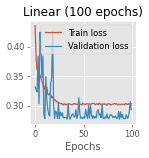

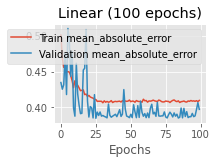

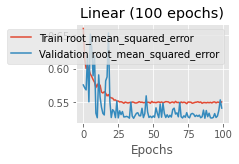

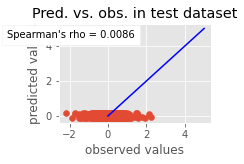

In [151]:
#plot the four metrics
#open the plot
plt.figure(figsize=(5,5), dpi=60) # 10 is width, 4 is height
#loss panel
plt.subplot(2,2,1)
plot_loss_history(history, metric='loss', title='Linear ({} epochs)'.format(num_epochs))
#mae panel
plt.subplot(2,2,2)
plot_loss_history(history, metric='mean_absolute_error', title='Linear ({} epochs)'.format(num_epochs))
#rmsq panel
plt.subplot(2,2,3)
plot_loss_history(history, metric='root_mean_squared_error', title='Linear ({} epochs)'.format(num_epochs))
#predicted vs observed panel
plt.subplot(2,2,4)
plt.scatter(y, y_pred) #equivalent: plt.plot(y, y_pred, "o")
plt.plot([0, 5], [0, 5], color='b') #draw the main diagonal, for reference
plt.xlabel("observed values") #labelling the axis
plt.ylabel("predicted values")
plt.title("Pred. vs. obs. in test dataset") #title
plt.text(.50,.94,"Spearman's rho = {}".format(round(accuracy, 4)), bbox={'facecolor':'w','pad':5}, ha="right", va="top", transform=plt.gca().transAxes) #title
    #bbox_inches='tight' is used to reduce the margins
        #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
#close the plot
plt.show()

In [136]:
#Calculate different metrics to evaluate
from sklearn.metrics import mean_absolute_error as mae #for calculating mean absolute error

print("Pearson's correlation test  : " + str(y.corr(y_pred, method='pearson')))
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
print("Spearman's correlation test : " + str(y.corr(y_pred, method='spearman')))
print('Root Mean Square Error      : ' + str(np.sqrt(sum((y-y_pred)**2)/len(y))))
print('Mean Absolute Error         : ' + str(mae(y, y_pred)))
print('Target mean                 : ' + str(y.mean()))
print('Predictions mean            : ' + str(y_pred.mean()))
    #more: https://keras.io/api/metrics/regression_metrics/


Pearson's correlation test  : 0.0044088748423036055
Spearman's correlation test : 0.032496860971212814
Root Mean Square Error      : 0.5448483468839544
Mean Absolute Error         : 0.4021824231799952
Target mean                 : 0.01619591492900875
Predictions mean            : 0.15822726


In [137]:
##Extract the weights of the first layer as a first approximation to feature importance

#extracting weights and biases from the first layer
first_layer_weights = final_model.layers[0].get_weights()[0]
first_layer_biases = final_model.layers[0].get_weights()[1]

#taking a look at the shape of the weights matrix
print(first_layer_weights.shape) #each feature (16 rows) has a weight for each node (16 columns)
    #In the example of the DL course, they got 13 rows, and they had 13 features. While the number of columns was equal to the number of nodes in the first layer. Then, they transposed and show the result.

#we are interested in absolute values of the weights since a -15 is way more important than a +0.1
first_layer_weights = np.absolute(first_layer_weights)

#It's handy to have a pandas dataframe for data exploration and description
w = pd.DataFrame(first_layer_weights)

#it's also better to have features as columns and nodes as rows, since many statistics are available out of the box on a by-column basis
w = w.transpose()
print(w)

#summary statistics per column (feature)
summary_statistics = w.describe()

#see the average across all 16 feature
summary_statistics.iloc[1] 
header[1:len(header)] #predictor names in order from the source
	
#Results:
	#recombination rate (third) does not have the greatest weight, which does not make sense. It would be better to have a way to integrate the weights of a feature across layers..

(2, 360)
            0         1
0    0.092491  0.071381
1    0.089529  0.023271
2    0.010059  0.129017
3    0.063648  0.054853
4    0.045845  0.048223
..        ...       ...
355  0.003522  0.028538
356  0.067362  0.080799
357  0.098071  0.004790
358  0.120307  0.042085
359  0.036335  0.066550

[360 rows x 2 columns]


NameError: name 'header' is not defined

In [68]:


from sklearn.model_selection import train_test_split #for splitting the data into training and evaluation datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [55]:
X_train.shape

(2736, 11)

In [69]:
## # Configuration options
input_shape = (X_train.shape[1],) ## tuple that specifies the number of features 
hidden_nodes = 64
hidden_activation = 'relu'
output_activation = 'linear'
loss_function = 'mean_squared_error'
optimizer_used = 'rmsprop' ##stochastic gradient descent
num_epochs = 100

print(input_shape)

(2,)


In [79]:
from keras.models import Sequential
from keras.layers import Dense ## a "dense" layer is a layer were all the data coming in are connected
#to all nodes.

# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(units=hidden_nodes, activation=hidden_activation))
model.add(Dense(units=hidden_nodes, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))


#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizer_used, loss=loss_function)

In [80]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=0)

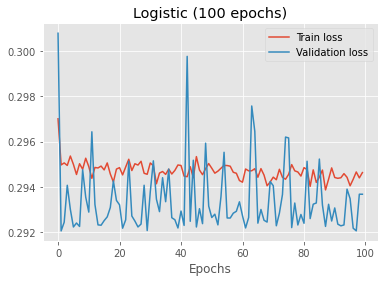

In [82]:
import matplotlib.pyplot as plt
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show() 

plot_loss_history(history, 'Logistic ({} epochs)'.format(num_epochs))

In [83]:
#predicting, and reporting the shape of the obtained object (also known as y hat)
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(685, 1)


array([[ 1.62473004e-02],
       [ 2.46144999e-02],
       [ 1.50822569e-02],
       [ 1.90480053e-02],
       [ 4.50406037e-03],
       [ 1.76320840e-02],
       [ 1.86316483e-03],
       [ 2.91318409e-02],
       [ 2.05953512e-02],
       [ 2.27659270e-02],
       [ 1.20652206e-02],
       [ 2.81104818e-03],
       [ 1.21632777e-03],
       [ 7.11900368e-03],
       [ 2.50441730e-02],
       [ 9.58063267e-03],
       [ 2.38383152e-02],
       [ 2.77743340e-02],
       [ 7.33053312e-04],
       [ 8.35931115e-03],
       [ 1.24594029e-02],
       [ 1.57373492e-02],
       [ 1.71940178e-02],
       [ 2.96176001e-02],
       [ 7.87494704e-03],
       [ 2.02201493e-03],
       [ 8.97966512e-03],
       [ 1.62771996e-02],
       [ 2.34380625e-02],
       [ 2.44436227e-02],
       [ 9.00736637e-03],
       [ 1.74714606e-02],
       [ 1.32429991e-02],
       [ 1.36830900e-02],
       [ 9.46871005e-03],
       [ 1.70686524e-02],
       [ 1.01347640e-02],
       [ 1.65455248e-02],
       [ 8.6

In [84]:
#changing forma to pandas Series, for handiness
y_pred = pd.Series(predictions[:,0])
y = pd.Series(y_test)

#computing correlation
accuracy = y.corr(y_pred, method='pearson')
print("accuracy (measured as Pearson's correlation) is: ", accuracy)

accuracy (measured as Pearson's correlation) is:  -0.017970208911957476


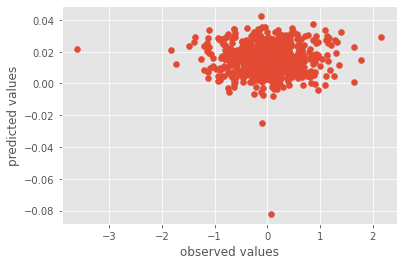

In [85]:
plt.style.use('ggplot')

plt.scatter(y, y_pred)
#equivalent: plt.plot(y, y_pred, "o")

# draw the main diagonal, for reference
#plt.plot([0, 0.1], [0, 0.1], color='b')

#labelling the axis
plt.xlabel("observed values")
plt.ylabel("predicted values")

plt.show()

In [ ]:
search_2.cv_results_

In [ ]:
search_1.cv_results_

For now we are not using the GridSearch, we will explore this in the future

Let's see the coefficients (importance of each predictor)

In [ ]:
#print(ridge_model_1.feature_importances_)
#print(ridge_model_2.feature_importances_)

In [ ]:
null_model = RandomForestRegressor(random_state=565735)
full_model = RandomForestRegressor(random_state=565735)

null_model.fit(X=predictors_null_model_array, y=y)
full_model.fit(X=X, y=y)

In [ ]:
df_merged_modeling.columns

In [ ]:
from sklearn import metrics

null_model_pred = null_model.predict(X=predictors_null_model_array)
full_model_pred = full_model.predict(X=X)

In [ ]:
print("Null model: Mean absolute error:", metrics.mean_absolute_error(y, null_model_pred))
print("Null model: Mean squared error:", metrics.mean_squared_error(y, null_model_pred))
print("Null model: Root mean squared error:", metrics.mean_squared_error(y, null_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Null model: R^2:", metrics.r2_score(y, null_model_pred))
    #0.83

In [ ]:
print("Full model: Mean absolute error:", metrics.mean_absolute_error(y, full_model_pred))
print("Full model: Mean squared error:", metrics.mean_squared_error(y, full_model_pred))
print("Full model: Root mean squared error:", metrics.mean_squared_error(y, full_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Full model: R^2:", metrics.r2_score(y, full_model_pred))

Let's calculate the different in R2 between the two models in percentage:

In [ ]:
(metrics.r2_score(y, full_model_pred) - metrics.r2_score(y, null_model_pred))*100
    #1.79

In [ ]:
feat_importances = pd.Series(full_model.feature_importances_, index=df_merged_modeling.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
#open a plot with two panels
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=null_model_pred, y=y, s=0.5)
ax2.scatter(x=full_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Null model")
ax1.set_ylabel("Observed % change")
ax1.set_xlabel("Predicted % change")
ax2.title.set_text("Full model (Twitter augmented)")
ax2.set_ylabel("Observed % change")
ax2.set_xlabel("Predicted % change")

#add R2
ax1.text(0.17, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, null_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.38, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, full_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

### Next steps

- check moving averages
- Try to reach R2 of 0.9 modifying only twitter variables, so the model improving is only the twitter augumented
- Cross validation and parameter optimization
    - Compare RMSE between models in the evaluation datasets!!!
    - Avoid overfitting! You can sue many predictors, but use CV to avoid overftting!
- Include previous sentiment, this could be more useful for prediction? we do not need current sentiment...
    - Robert said to use the sentiment of the last week, month..
- Improve definition of the base model
- Try more models?
    - time series?
        - ARIMA considers shocks!
    - ensemble of random forest?
    - neural networks?
- Extend to other currencies?